In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/okendo-xai/BRAIN_TUMOR/training/pituitary/Tr-pi_0532.jpg
/kaggle/input/okendo-xai/BRAIN_TUMOR/training/pituitary/Tr-pi_0282.jpg
/kaggle/input/okendo-xai/BRAIN_TUMOR/training/pituitary/P_681 (2).jpg
/kaggle/input/okendo-xai/BRAIN_TUMOR/training/pituitary/Te-pi_0059.jpg
/kaggle/input/okendo-xai/BRAIN_TUMOR/training/pituitary/Tr-pi_1401.jpg
/kaggle/input/okendo-xai/BRAIN_TUMOR/training/pituitary/p (538).jpg
/kaggle/input/okendo-xai/BRAIN_TUMOR/training/pituitary/Tr-pi_0914.jpg
/kaggle/input/okendo-xai/BRAIN_TUMOR/training/pituitary/Tr-pi_0691.jpg
/kaggle/input/okendo-xai/BRAIN_TUMOR/training/pituitary/Tr-pi_0972.jpg
/kaggle/input/okendo-xai/BRAIN_TUMOR/training/pituitary/P_179 (2).jpg
/kaggle/input/okendo-xai/BRAIN_TUMOR/training/pituitary/P_343.jpg
/kaggle/input/okendo-xai/BRAIN_TUMOR/training/pituitary/P_662 (2).jpg
/kaggle/input/okendo-xai/BRAIN_TUMOR/training/pituitary/p (374).jpg
/kaggle/input/okendo-xai/BRAIN_TUMOR/training/pituitary/Te-pi_0024.jpg
/kaggle/input/okendo

In [2]:
import os
import csv
import cv2
import numpy as np

# Paths
train_dir = "/kaggle/input/okendo-xai/BRAIN_TUMOR/training"  # Replace with your train directory in Kaggle
test_dir = "/kaggle/input/okendo-xai/BRAIN_TUMOR/testing"    # Replace with your test directory in Kaggle
output_csv = "/kaggle/working/brain_tumor_metadata.csv"  # Output CSV file name

# Header
header = [
    "Image_ID", "File_Path", "Class_Label", "Image_Modality", "Patient_ID",
    "Age", "Sex", "Tumor_Grade", "Intensity", "Texture", "Size", 
    "Shape", "Volume", "Resolution", "Tumor_Type", "Dataset_Split"
]

# Function to extract metadata from an image
def extract_image_metadata(file_path):
    try:
        # Read image
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            return None, None, None, None, None, None

        # Extract metadata
        shape = image.shape  # (height, width)
        resolution = f"{shape[1]}x{shape[0]}"  # width x height
        intensity = np.mean(image)  # Mean pixel intensity
        texture = np.std(image)  # Standard deviation of pixel intensities
        size = os.path.getsize(file_path)  # File size in bytes
        volume = shape[0] * shape[1]  # Volume (height x width, in pixels)

        return shape, resolution, intensity, texture, size, volume
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None, None, None, None, None, None

# Function to scan directories and save metadata to a CSV file
def generate_metadata_csv(directories, output_csv):
    data_rows = []
    image_id_counter = 1

    for dataset_split, directory in directories.items():
        for class_label in os.listdir(directory):
            label_dir = os.path.join(directory, class_label)
            
            if os.path.isdir(label_dir):  # Ensure it's a directory
                for file_name in os.listdir(label_dir):
                    if file_name.lower().endswith((".jpg", ".jpeg", ".png")):  # Check for image files
                        file_path = os.path.join(label_dir, file_name)
                        
                        # Extract metadata
                        metadata = extract_image_metadata(file_path)
                        if metadata[0] is None:
                            continue  # Skip files that couldn't be processed
                        
                        shape, resolution, intensity, texture, size, volume = metadata
                        
                        # Append the extracted data
                        data_rows.append([
                            f"I{image_id_counter:05d}",  # Image_ID
                            file_path,  # File_Path
                            class_label,  # Class_Label
                            "",  # Image_Modality (if missing in the image, leave blank)
                            "",  # Patient_ID
                            "",  # Age
                            "",  # Sex
                            "",  # Tumor_Grade
                            intensity,  # Intensity
                            texture,  # Texture
                            size,  # Size
                            shape,  # Shape
                            volume,  # Volume
                            resolution,  # Resolution
                            "",  # Tumor_Type
                            dataset_split  # Dataset_Split
                        ])
                        image_id_counter += 1

    # Write to CSV
    with open(output_csv, mode="w", newline="", encoding="utf-8") as file:
        writer = csv.writer(file)
        writer.writerow(header)  # Write header
        writer.writerows(data_rows)  # Write rows

    print(f"Metadata saved to {output_csv}")

# Define directories for Train and Test datasets
directories = {
    "Train": train_dir,
    "Test": test_dir
}

# Generate metadata CSV
generate_metadata_csv(directories, output_csv)


Metadata saved to /kaggle/working/brain_tumor_metadata.csv


Class distribution:
Class_Label
meningioma          4258
glioma              4199
pituitary           4196
notumor             3122
pituitary_tumor      150
meningioma_tumor     150
glioma_tumor         150
normal               150
Name: count, dtype: int64


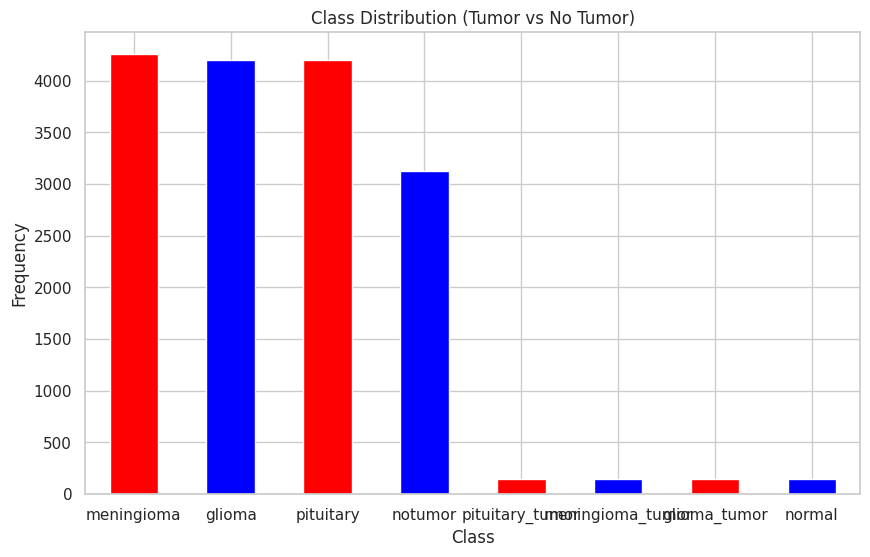


Missing data analysis:
Image_ID              0
File_Path             0
Class_Label           0
Image_Modality    16375
Patient_ID        16375
Age               16375
Sex               16375
Tumor_Grade       16375
Intensity             0
Texture               0
Size                  0
Shape                 0
Volume                0
Resolution            0
Tumor_Type        16375
Dataset_Split         0
dtype: int64


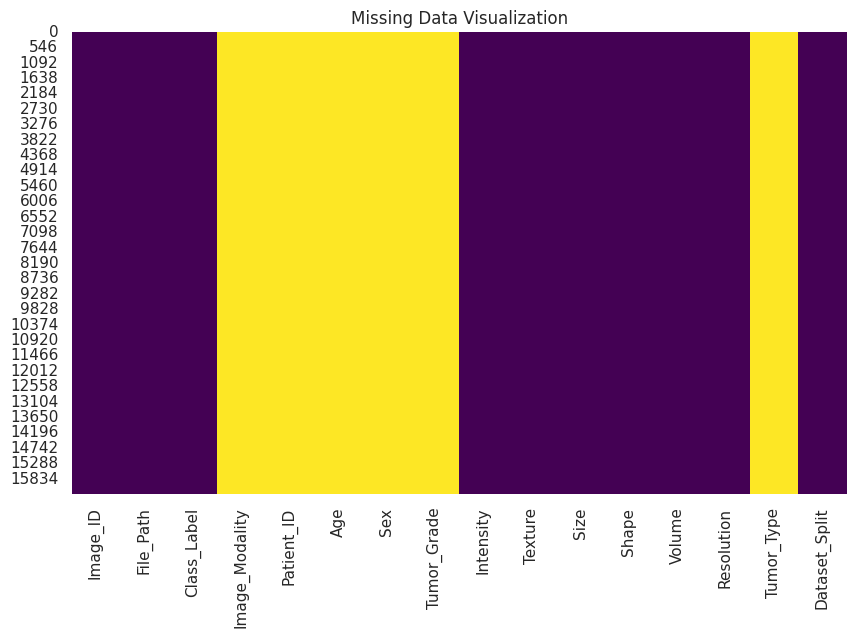

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os

# Load the metadata CSV file
df = pd.read_csv("/kaggle/working/brain_tumor_metadata.csv")

# Set the style for plots
sns.set(style="whitegrid")


# 1. Class Distribution Analysis-[Check if class balance/imbalance exists in the dataset]
class_counts = df['Class_Label'].value_counts()
print("Class distribution:")
print(class_counts)

# Plot a bar chart of class distribution
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color=['red', 'blue'])
plt.title('Class Distribution (Tumor vs No Tumor)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# 2. Missing Data Analysis-[Check for missing values in each column]
missing_data = df.isnull().sum()
print("\nMissing data analysis:")
print(missing_data)

# Plot a heatmap to visualize missing data (if any)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title('Missing Data Visualization')
plt.show()


# 3. Class Image Quality and Size Analysis-[ Function to get the image dimensions (height and width)]
def get_image_size(image_path):
    try:
        with Image.open(image_path) as img:
            return img.size  # returns (width, height)
    except Exception as e:
        return None

for idx, row in df.iterrows():
    image_path = os.path.join(image_folder_path, f"{row['Image_ID']}.jpg")  # Assuming .jpg extension
    size = get_image_size(image_path)
    if size:
        image_sizes.append(size)

# Convert image sizes into a DataFrame
image_size_df = pd.DataFrame(image_sizes, columns=['Width', 'Height'])
